## 1차원 데이터

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/kdt_231026/m3_분석라이브러리/통계/data/ch2_scores_em.csv',index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [ ]:
scores = np.array(df.english)[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [ ]:
scores_df = pd.DataFrame({'score':scores},index=list('ABCDEFGHIJ'))
scores_df.head()

,score
A,42
B,69
C,56
D,41
E,57


In [ ]:
scores_df = pd.DataFrame({'score':scores},
                        index=pd.Index(list('ABCDEFGHIJ'),name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [ ]:
# 평균값 - 배열
sum(scores)/len(scores)
np.mean(scores)

55.0

In [ ]:
# 평균값 - 데이터프레임
scores_df.mean()

score    55.0
dtype: float64

In [ ]:
# 중앙값
np.median(scores)
scores_df.median()

score    56.5
dtype: float64

In [ ]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [ ]:
# median
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0+m1) / 2
else:
    median = sorted_scores[(n+1)//2-1]
median

56.5

In [ ]:
# 최빈값
scores_df.mode()

,score
0,65


In [ ]:
pd.Series(sorted_scores).mode()

0    65
dtype: int64

In [ ]:
scores_df.describe()

,score
count,10.000000
mean,55.000000
std,9.775252
min,41.000000
25%,48.250000
50%,56.500000
75%,63.250000
max,69.000000


<Axes: xlabel='score', ylabel='Count'>

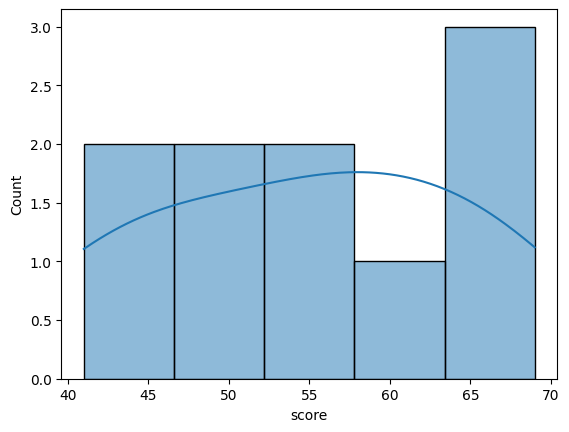

In [ ]:
# kde=True: 이 옵션은 커널 밀도 추정(Kernel Density Estimate) 곡선을 히스토그램과 함께 표시하도록 합니다.
# KDE는 데이터 분포의 연속적인 추정을 제공하여, 히스토그램 위에 부드러운 곡선 형태로 나타납니다.
# 주어진 데이터 샘플로부터 전체 데이터 분포의 형태를 추정
import seaborn as sns
sns.histplot(data=scores_df,x='score',kde=True)

         score
student       
A           42
B           69
C           56
D           41
E           57
F           48
G           65
H           49
I           65
J           58
         score
student       
A           42
B           69
C           56
D           41
E           57
F           48
G           65
H           49
I           65
J            1


<Axes: xlabel='score', ylabel='Count'>

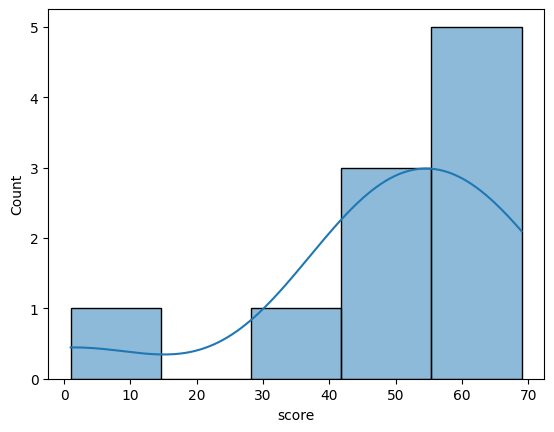

In [ ]:
# 평균값 < 중앙값
scores_df_a = scores_df.copy()
print(scores_df_a)
scores_df_a.iloc[9,0] = 1
print(scores_df_a)
sns.histplot(data=scores_df_a,x='score',kde=True)

In [ ]:
scores_df_a.describe()

,score
count,10.000000
mean,49.300000
std,19.556471
min,1.000000
25%,43.500000
50%,52.500000
75%,63.000000
max,69.000000


<Axes: xlabel='score', ylabel='Count'>

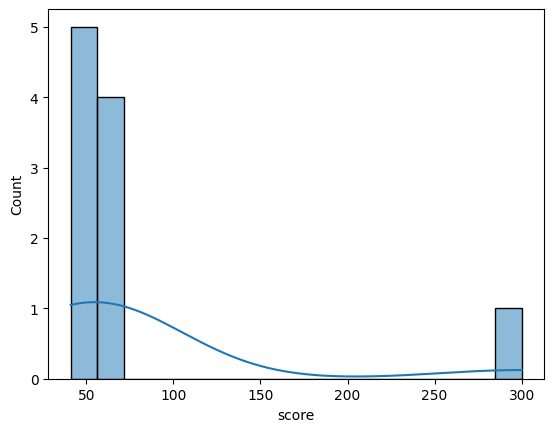

In [ ]:
# 평균값 > 중앙값
scores_df_b = scores_df.copy()
scores_df_b.iloc[9,0] = 300
sns.histplot(data=scores_df_b,x='score',kde=True)

In [ ]:
scores_df_b.describe()

,score
count,10.000000
mean,79.200000
std,78.187524
min,41.000000
25%,48.250000
50%,56.500000
75%,65.000000
max,300.000000


분산(Variance)과 표준편차(Standard Deviation)
- 통계학에서 데이터의 분포를 측정하는 데 사용되는 두 가지 중요한 개념.
- 이들은 데이터가 평균값으로부터 얼마나 퍼져 있는지(즉, 얼마나 분산되어 있는지)를 나타낸다.
- 분산과 표준편차는 데이터의 변동성을 이해하는 데 중요한 도구이며 이러한 측정값을 통해 데이터 집합의 일관성과 예측 가능성을 파악할 수 있다.

분산 (Variance)
- 정의: 데이터 포인트들이 평균에서 얼마나 멀리 떨어져 있는지를 측정하는 값.수학적으로 분산은 각 데이터 포인트와 평균값의 차이를 제곱한 후, 이를 모든 데이터 포인트의 개수로 나누어 평균을 낸 값.
- 의미: 분산이 크다는 것은 데이터 포인트들이 평균에서 멀리 떨어져 있다는 것을 의미하며, 이는 데이터가 넓게 퍼져 있다는 것을 나타낸다. 분산이 작다는 것은 데이터 포인트들이 평균값에 가깝게 모여 있다는 것을 의미하며 이는 데이터가 좁게 집중되어 있다는 것을 나타낸다.

표준편차 (Standard Deviation)
- 정의: 표준편차는 분산의 제곱근으로, 데이터 포인트들이 평균에서 얼마나 멀리 떨어져 있는지를 나타내는 또 다른 방법.
분산의 단위는 원래 데이터의 단위의 제곱이 되지만, 표준편차는 원래 데이터와 동일한 단위를 갖는다.
- 의미: 표준편차가 크다는 것은 데이터 포인트들이 평균에서 멀리 떨어져 있다는 것을 의미하며, 데이터가 넓게 분포되어 있다는 것을 나타낸다. 표준편차가 작다는 것은 데이터 포인트들이 평균값에 가까이 모여 있다는 것을 의미하며, 데이터가 좁게 집중되어 있다는 것을 나타낸다.

In [ ]:
# 데이터의 산포도 지표
# 분산과 표준편차
# 편차(deviation)
print(scores_df.describe(),'\n')
mean = np.mean(scores)

print(mean)
print(scores)
deviation = scores - mean
print(deviation)

           score
count  10.000000
mean   55.000000
std     9.775252
min    41.000000
25%    48.250000
50%    56.500000
75%    63.250000
max    69.000000 

55.0
[42 69 56 41 57 48 65 49 65 58]
[-13.  14.   1. -14.   2.  -7.  10.  -6.  10.   3.]


In [ ]:
sum(deviation)
np.mean(deviation)

0.0

#### 분산
- 불편분산 : 불편분산(Unbiased Variance)은 표본 데이터를 사용하여 모집단의 분산을 추정할 때 편향을 최소화하기 위해 사용되는 개념
 * 일반적으로 표본 분산은 모분산을 과소평가하는 경향이 있는데, 불편분산은 이러한 편향을 조정
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산.
 * Numpy는 표본분산, Pandas는 불편분산
 * Pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof=0이라고 설정, 불편분산은 ddof=1일 때 해당됨

[표본분산이 분산을 과소평가하는 이유]

- 분산은 '데이터와 평균값의 간의 거리' 이므로 모평균 간의 거리를 계산 : np.sum((fish_data - mu)**2)/N  
호수안에 물고기가 7마리 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4,  
샘플링 3마리 {1,2,3} 표본평균 2  
이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N 대신 N-1로 나누어 불편분산을 구할 수 있다.

In [ ]:
fish_data = [1,2,3,4,5,6,7]
mu = 4
div = []
for f in fish_data:
  div.append((f-mu)**2)
print(div,'\n')
sum(div)/len(fish_data)

[9, 4, 1, 0, 1, 4, 9] 



4.0

In [ ]:
sample = [1,2,3]
m = 2
div = []
for s in sample:
  div.append((s-m)**2)
print(div,'\n')
sum(div)/len(sample)

[1, 0, 1] 



0.6666666666666666

In [ ]:
# 넘파이 - 표본분산
np.mean(deviation ** 2)
np.var(scores)

86.0

In [ ]:
# 판다스 - 불편분산
scores_df.var()

score    95.555556
dtype: float64

In [ ]:
# 넘파이 - 불편분산
np.var(scores,ddof=1)

95.55555555555556

In [ ]:
# 판다스 - 표본분산
scores_df.var(ddof=0)

score    86.0
dtype: float64

In [ ]:
# 표준편차
np.sqrt(np.var(scores))
np.std(scores, ddof=0)

9.273618495495704

In [ ]:
# 범위와 4분위수
# 범위
np.max(scores) - np.min(scores)

28

In [ ]:
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [ ]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [ ]:
# 데이터의 정규화
print(scores)
print(f'평균: {scores.mean()}, 표준편차: {scores.std().round(4)}')

[42 69 56 41 57 48 65 49 65 58]
평균: 55.0, 표준편차: 9.2736


In [ ]:
# 표준화
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [ ]:
55.0 + z*scores.std()

array([42., 69., 56., 41., 57., 48., 65., 49., 65., 58.])

In [ ]:
# 데이터의 시각화
english_scores = np.array(df.english)
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [ ]:
# 도수분포표
freq,_=np.histogram(english_scores,bins=10,range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [ ]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_class

['0~10',
 '10~20',
 '20~30',
 '30~40',
 '40~50',
 '50~60',
 '60~70',
 '70~80',
 '80~90',
 '90~100']

In [ ]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq}, index=pd.Index(freq_class,name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [ ]:
# 계급값 : 각 계급을 대표하는 값으로 계급의 중앙값이 이용됨
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [ ]:
# 상대도수 : 해당 계급 데이터의 상대적인 비율
rel_freq = freq /freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [ ]:
# 누적 상대도수 : 해당 계급까지의 상대도수의 합
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [ ]:
freq_dist_df['class_value'] = class_value
freq_dist_df['relative_frequency'] = rel_freq
freq_dist_df['cumulative_frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class_value','frequency','relative_frequency','cumulative_frequency']]
freq_dist_df

,class_value,frequency,relative_frequency,cumulative_frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [ ]:
# 최빈값
freq_dist_df.loc[freq_dist_df.frequency.idxmax(),'class_value']

65

(array([ 0.,  0.,  0.,  2.,  8., 16., 18.,  6.,  0.,  0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

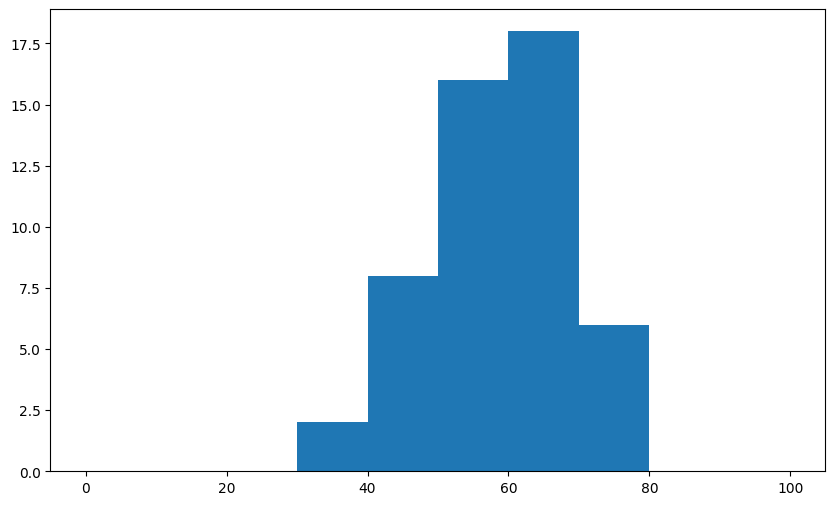

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(english_scores,bins=10,range=(0,100))

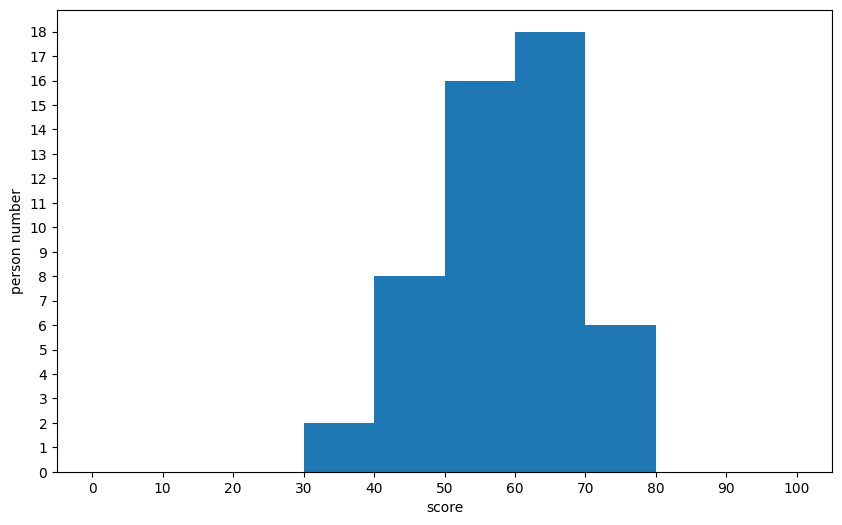

In [ ]:
# 히스토그램 : 도수분포표를 막대그래프로 표현
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

freq, _, _ = plt.hist(english_scores,bins=10,range=(0,100))
plt.xlabel('score')
plt.ylabel('person number')
plt.xticks(np.linspace(0,100,10+1))
plt.yticks(np.arange(0,freq.max()+1))

plt.show()

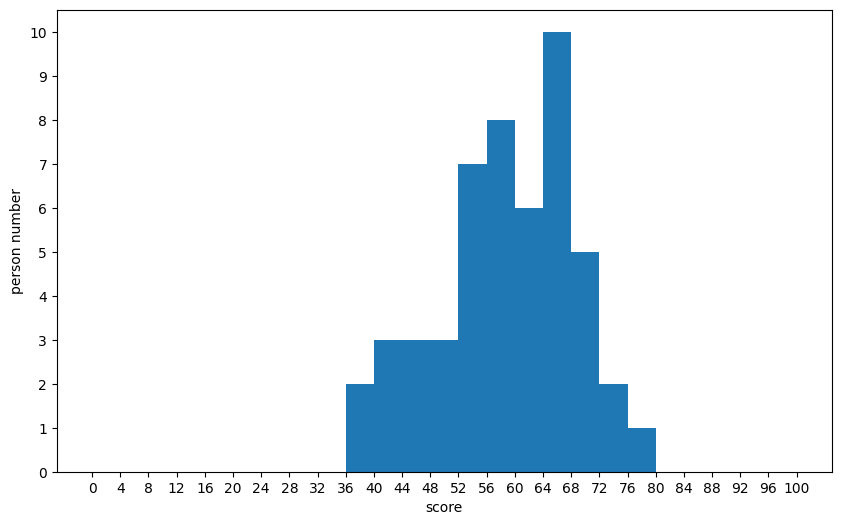

In [ ]:
plt.figure(figsize=(10,6))

freq, _, _ = plt.hist(english_scores,bins=25,range=(0,100))
plt.xlabel('score')
plt.ylabel('person number')
plt.xticks(np.linspace(0,100,25+1))
plt.yticks(np.arange(0,freq.max()+1))
plt.show()

Q. 아래 상대도수를 나타내는 히스토그램에 추가하여 누적 상대도수(y축 왼쪽)를 꺽은선 그래프로 표현하세요.

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.04 0.06 0.06 0.06 0.14
 0.16 0.12 0.2  0.1  0.04 0.02 0.   0.   0.   0.   0.  ]


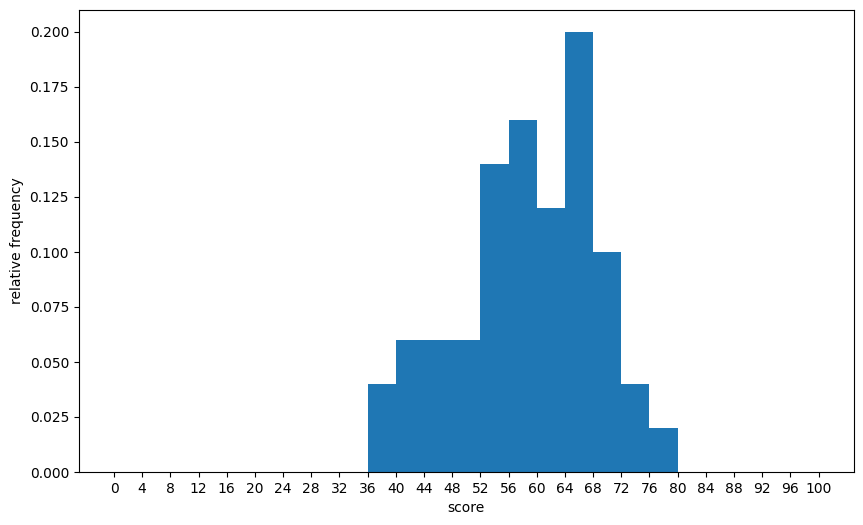

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)

weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                          range=(0, 100), weights=weights)
print(rel_freq)
ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))
plt.show()

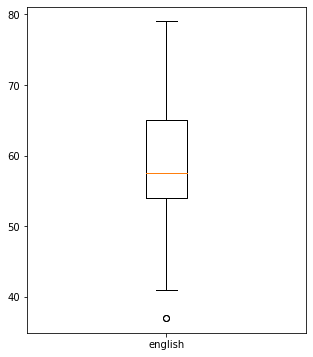

In [ ]:
# box plot
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(5,6))
plt.boxplot(english_scores,labels=['english'])
plt.show()

In [ ]:
english_scores = np.array(df.english)
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

Q. 타이타닉 데이터셋에서 age, pclass, fare, sex, embarked 컬럼 중 2개를 선택하여 각 컬럼의 특징을 설명하고 종속변수인 survived와의 관계를 기술하세요.
- 각 컬럼에 대한 전처리 후 기초 통계량, 시각화를 통한 분포 및 특징 탐색, 이상치 여부 탐색
- 선택한 컬럼을 가장 잘 활용할 수 있는 형태로 변환

## 2차원 데이터

공분산 :
 - 공분산 : 2개의 연속형 변수의 관계성을 확인하는 통계량
 - 공분산이 0보다 클 때 : 변수 한쪽이 큰 값을 갖게되면 다른 한 쪽도 커짐
 - 공분산이 0보다 작을 때 : 변수 한쪽이 큰 값을 갖게되면 다른 한 쪽도 작아짐
 - 공분산이 0일 때 : 변수 사이에 관계성이 없음
 - 공분산은 편리한 지표지만 최대값이나 최소값이 얼마가 될 지 알 수가 없으며
 - 단위가 cm에서 m로 변하면 공분산의 값도 변함. 사용이 편하도록 -1 ~ +1의 범위로 보정

피어슨 상관계수 : 공분산을 최대값 1, 최소값 -1 사이가 되도록 표준화
 - cov / sp.sqrt(sigma_2_x * sigma_2_y)
 - 상관행렬 : 여러 변수의 상관계수들을 행렬 형태로 정리
 - 상관계수가 무의미할 때 : 상관계수가 0에 가까운 값을 가질 때는 실제 그래프로 관계를 확인

In [1]:
import numpy as np

# Example data arrays
data1 = np.array([1, 2, 3, 4, 5])
data2 = np.array([5, 4, 3, 2, 1])

# 공분산 행렬은 대각선 요소가 개별 데이터 집합의 분산을 나타내고 비대각선 요소가 데이터 집합 간의 공분산을 나타내는 2x2 행렬
covariance_matrix = np.cov(data1, data2)

# Extracting the covariance value
covariance = covariance_matrix[0, 1]

print("Covariance matrix:\n", covariance_matrix)
print("Covariance between data1 and data2:", covariance)


Covariance matrix:
 [[ 2.5 -2.5]
 [-2.5  2.5]]
Covariance between data1 and data2: -2.5


공분산 행렬 (Covariance Matrix)
- 정의: 공분산 행렬은 여러 변수들 간의 공분산을 포함하는 정사각 행렬. 공분산은 두 변수의 상호 변동성을 나타낸다. 즉, 한 변수가 증가할 때 다른 변수가 어떻게 변하는지를 보여준다.
- 계산:
$$ Cov(X, Y) = \frac{\sum_{i=1}^{n} (x_i - \mu_X) \cdot (y_i - \mu_Y)}{n - 1}$$

- 해석: 공분산이 양수이면 두 변수가 함께 증가. 공분산이 음수이면 한 변수가 증가할 때 다른 변수가 감소. 공분산의 크기는 변수들 간의 관계 강도를 정확히 나타내지 않으며, 단위에 의존적이다.

상관계수 행렬 (Correlation Matrix)
- 정의: 상관계수 행렬은 여러 변수들 간의 상관계수를 포함하는 정사각 행렬. 상관계수는 두 변수 간의 선형 관계의 강도와 방향을 나타낸다.
- 계산: 피어슨 상관계수는 다음 공식으로 계산
$$r_{xy} = \frac{\sum_{i=1}^{n} (x_i - \mu_X) \cdot (y_i - \mu_Y)}{\sqrt{\sum_{i=1}^{n} (x_i - \mu_X)^2} \cdot \sqrt{\sum_{i=1}^{n} (y_i - \mu_Y)^2}}$$
- 해석: 상관계수의 범위는 -1에서 +1까지이다.
+1은 완벽한 양의 선형 관계를, -1은 완벽한 음의 선형 관계를, 0은 선형 관계의 부재를 나타낸다. 상관계수는 두 변수 간 관계의 방향과 강도를 모두 나타내며, 단위에 영향을 받지 않는다.

In [2]:
# Function to calculate covariance
def calculate_covariance(X, Y):
    if len(X) != len(Y):
        return "Data sets must be of equal length."

    n = len(X)
    mean_X = sum(X) / n
    mean_Y = sum(Y) / n

    covariance = sum((X[i] - mean_X) * (Y[i] - mean_Y) for i in range(n)) / (n - 1)
    return covariance

# Example data
data1 = [1, 2, 3, 4, 5]
data2 = [5, 4, 3, 2, 1]

# Calculating the covariance
covariance = calculate_covariance(data1, data2)
print("Covariance:", covariance)


Covariance: -2.5


In [3]:
def calculate_correlation(X, Y):
    if len(X) != len(Y):
        return "Data sets must be of equal length."

    n = len(X)
    mean_X = sum(X) / n
    mean_Y = sum(Y) / n

    numerator = sum((X[i] - mean_X) * (Y[i] - mean_Y) for i in range(n))
    denominator = (sum((X[i] - mean_X) ** 2 for i in range(n)) * sum((Y[i] - mean_Y) ** 2 for i in range(n))) ** 0.5

    if denominator == 0:
        return "Division by zero error in calculation."

    correlation_coefficient = numerator / denominator
    return correlation_coefficient

# Example data
data1 = [1, 2, 3, 4, 5]
data2 = [5, 4, 3, 2, 1]

# Calculating the correlation coefficient
correlation = calculate_correlation(data1, data2)
print("Correlation Coefficient:", correlation)


Correlation Coefficient: -1.0


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/kdt_231026/m3_분석라이브러리/통계/data/ch2_scores_em.csv',index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [ ]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                         'mathematics':ma_scores},
                        index=pd.Index(list('ABCDEFGHIJ'),name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [ ]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = summary_df.english - summary_df.english.mean()
summary_df['mathematics_deviation'] = summary_df.mathematics - summary_df.mathematics.mean()
summary_df['product of deviation'] = summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [ ]:
print(np.var(scores_df.english))
print(np.var(scores_df.mathematics))

86.0
68.44000000000001


In [ ]:
summary_df['product of deviation'].mean()

62.8

In [ ]:
# np.cov(en_scores,ma_scores,ddof=1)
np.cov(en_scores,ma_scores,ddof=0)

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [ ]:
# n-1로 나눔
np.cov(en_scores,ma_scores, ddof=1) # default

array([[95.55555556, 69.77777778],
       [69.77777778, 76.04444444]])

In [ ]:
# 상관계수
np.cov(en_scores,ma_scores,ddof=0)[0,1] / (np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

In [ ]:
np.corrcoef(en_scores,ma_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [ ]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


Q. 타이타닉 데이터셋에서 age, fare 컬럼을 선택하여 공분산 행렬및 상관계수 행렬을 각각 구하여 비교하세요.


In [ ]:
import seaborn as sns
import pandas as pd

# 타이타닉 데이터셋 로드
titanic = sns.load_dataset('titanic')

# 선택된 컬럼: 'age', 'fare'
selected_columns = ['age', 'fare']

# 공분산 행렬 계산
cov_matrix = titanic[selected_columns].cov()

# 상관계수 행렬 계산
corr_matrix = titanic[selected_columns].corr()

cov_matrix, corr_matrix



(             age         fare
 age   211.019125    73.849030
 fare   73.849030  2469.436846,
            age      fare
 age   1.000000  0.096067
 fare  0.096067  1.000000)

Text(0, 0.5, 'Mathematices')

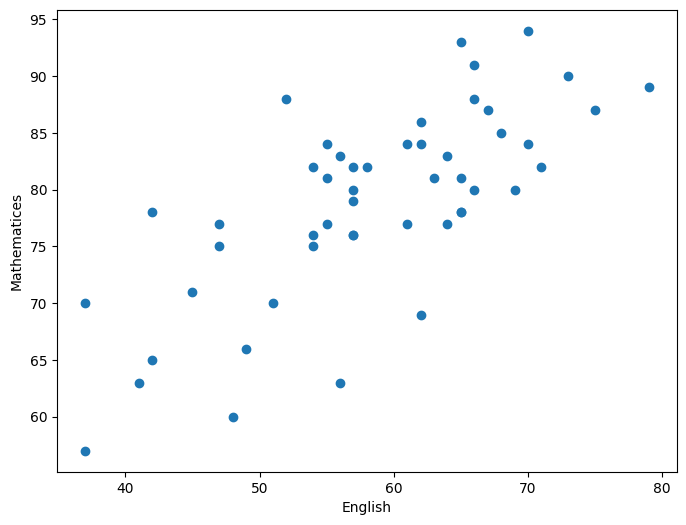

In [ ]:
# 2차원 데이터의 시각화
import matplotlib.pyplot as plt

english_scores = np.array(df.english)
math_scores = np.array(df.mathematics)

plt.figure(figsize=(8,6))
plt.scatter(english_scores,math_scores)
plt.xlabel('English')
plt.ylabel('Mathematices')

<Axes: xlabel='english', ylabel='mathematics'>

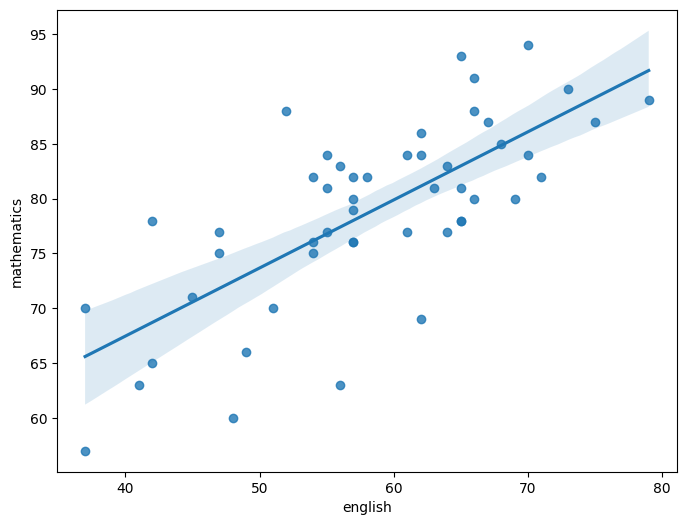

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.regplot(data=df,x='english',y='mathematics')

In [ ]:
# 회귀직선 구하기
poly_fit = np.polyfit(english_scores,math_scores,1)
poly_1d = np.poly1d(poly_fit)
eq = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x'
eq

'42.60+0.62x'

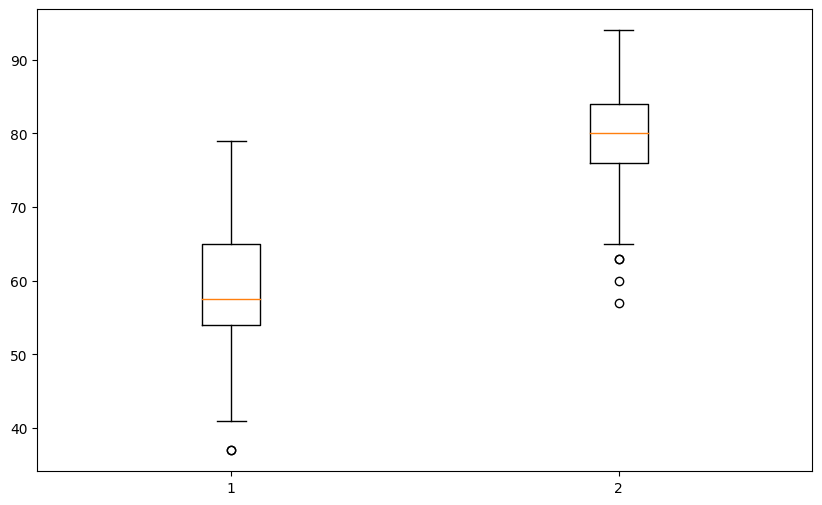

In [ ]:
# sns.boxplot(data=df,x='english')
plt.figure(figsize=(10,6))
plt.boxplot([english_scores,math_scores])
plt.show()

Q. english와 mathematices 2차원 데이터간의 관계를 파악할 수 있는 시각화를 수행하세요.

In [ ]:
df[['english','mathematics']].corr()

,english,mathematics
english,1.000000,0.723741
mathematics,0.723741,1.000000


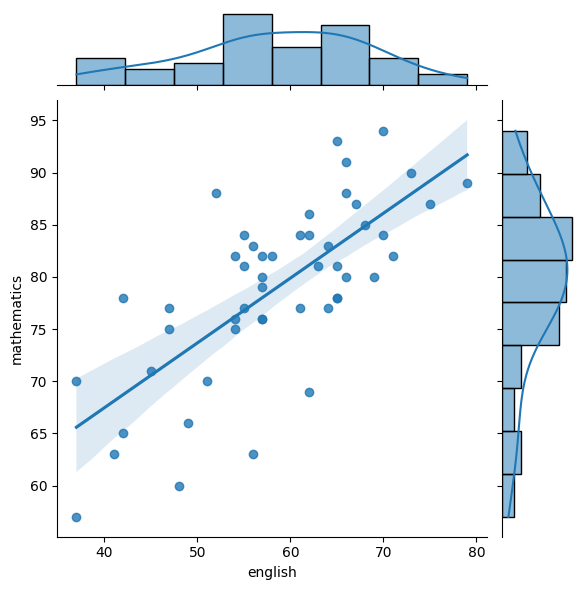

In [ ]:
# jointplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(data=df, x='english', y='mathematics', kind='reg')
plt.show()

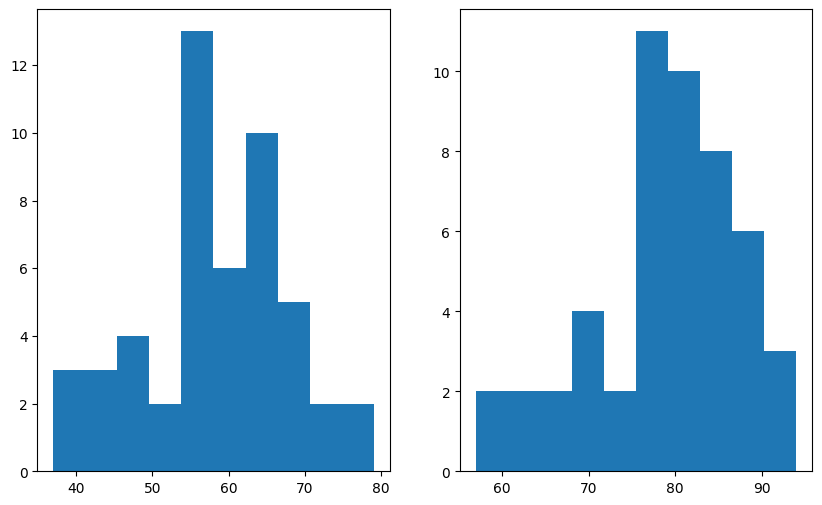

In [ ]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df.english)
ax2.hist(df.mathematics)
plt.show()

<Axes: >

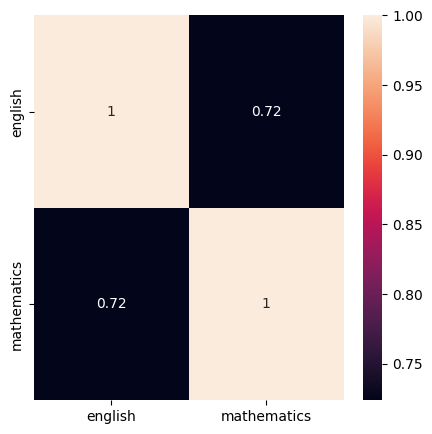

In [ ]:
# 히트맵
plt.figure(figsize=(5,5))
sns.heatmap(df[['english','mathematics']].corr(),annot=True)

데이터 스케일링 및 정규화

In [15]:
# 최소-최대 조정은 각 특성을 주어진 범위(일반적으로 0~1)로 조정하여 특성을 변환
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = np.array([[1], [2], [3], [4], [5]])
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

In [16]:
# Z-점수 정규화를 사용하여 주어진 데이터 배열을 표준화. 표준화는 평균이 0이고 분산이 1이 되도록 특성의 크기를 조정
from sklearn.preprocessing import StandardScaler

data = np.array([[1], [2], [3], [4], [5]])
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
standardized_data

array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])

In [17]:
# 지정된 데이터 배열에 이상치에 강한 강력한 스케일링을 적용. 이상값에 더 강력한 매개변수를 사용하므로 데이터세트에 이상값이 있는 경우 사용 검토
# 공식은 '(x - 중앙값(x)) / IQR(x)'
from sklearn.preprocessing import RobustScaler

data = np.array([[1], [2], [3], [4], [100]])  # Note the outlier
scaler = RobustScaler()
robust_scaled_data = scaler.fit_transform(data)
robust_scaled_data

array([[-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [48.5]])

In [18]:
# L2 표준을 사용하여 주어진 데이터 배열을 정규화. L2 정규화는 각 관측값에 대한 특성 전체의 제곱합(L2 표준 제곱)이 1이 되도록 데이터 크기를 조정
#  모든 요소의 제곱합의 제곱근으로 나눈다.
#  기능이 최종 거리에 비례적으로 기여하도록 하기 위해 텍스트 데이터 준비 및 K-Nearest Neighbors와 같은 기계 학습 방법에 일반적으로 사용
from sklearn.preprocessing import Normalizer

data = np.array([[1, 2, 3], [4, 5, 6]])
normalizer = Normalizer(norm='l2')
l2_normalized_data = normalizer.fit_transform(data)
l2_normalized_data

array([[0.26726124, 0.53452248, 0.80178373],
       [0.45584231, 0.56980288, 0.68376346]])

In [19]:
# 주어진 데이터 배열에  각 기능의 크기를 최대 절대값으로 조정
# 공식은 'x / max(abs(x))'
# 이 스케일링은 각 기능이 [-1, 1] 범위 내에 있도록 보장하고 데이터가 이미 0 주위에 중심에 있거나 희소 데이터에서 0 항목을 유지할 때 유용
from sklearn.preprocessing import MaxAbsScaler

data = np.array([[1, -1, 2], [3, 0, 0], [0, 1, -1]])
scaler = MaxAbsScaler()
max_abs_scaled_data = scaler.fit_transform(data)
max_abs_scaled_data

array([[ 0.33333333, -1.        ,  1.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        , -0.5       ]])

로그변환
- 값이 0이 될 수 있는 데이터세트에서는 log(0)이 유효한 작업이 아니기 때문에 0 값에 대해 직접 로그 변환(np.log 사용)이 정의되지 않는다.
- np.log1p를 사용하면 log(1+0)=0처럼 수학적 오류 없이 0 값을 변환

In [20]:
import numpy as np

# Sample data which includes a zero
data = np.array([0, 0.01, 0.1, 1, 10])

# Applying log1p transformation
log1p_transformed_data = np.log1p(data)
log1p_transformed_data

array([0.        , 0.00995033, 0.09531018, 0.69314718, 2.39789527])

로그 변환이 편향된 데이터의 분포에 어떻게 영향을 미칠 수 있는지 시각화하여 데이터를 보다 대칭적으로 만들고 추가 통계 분석 또는 기계 학습 모델링에 더 적합하게 만드는 데 도움

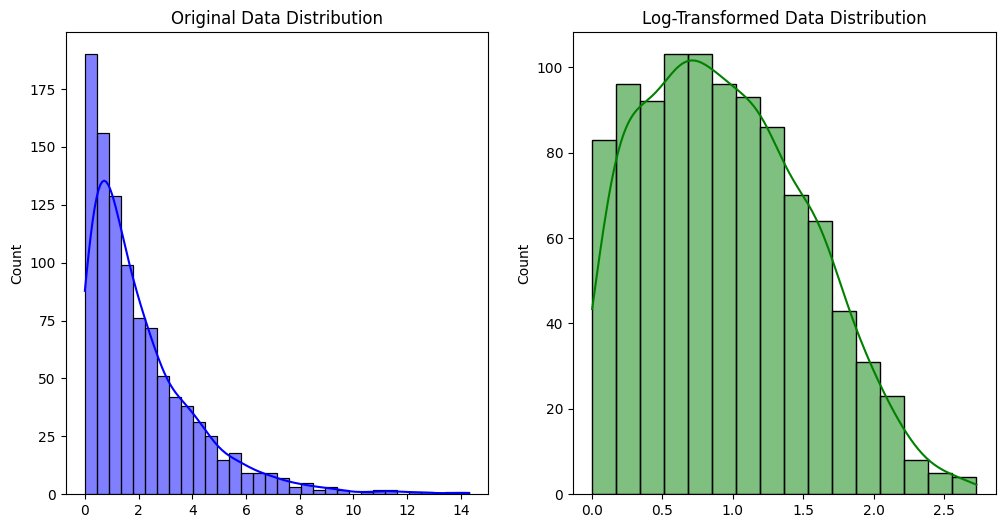

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generating a random dataset with a skewed distribution (using exponential distribution)
data = np.random.exponential(scale=2.0, size=1000)

# Plotting the original data distribution
plt.figure(figsize=(12, 6))

# First subplot for the original data
plt.subplot(1, 2, 1)
sns.histplot(data, kde=True, color='blue')
plt.title("Original Data Distribution")

# Applying log transformation to the data
# np.log1p is used to handle the log transformation of data including zero values
log_transformed_data = np.log1p(data)

# Second subplot for the log-transformed data
plt.subplot(1, 2, 2)
sns.histplot(log_transformed_data, kde=True, color='green')
plt.title("Log-Transformed Data Distribution")

# Display the plots
plt.show()


Q. 주어진 숫자 배열(예: [4, 8, 15, 16, 23, 42])에 대해 평균과 중앙값을 계산한 후 배열에 두 개의 극단값을 추가한 후(예: -100, 100), 다시 평균과 중앙값을 계산하고 비교하세요.

In [ ]:
import numpy as np
from scipy import stats

# 평균과 중앙값 계산
data = np.array([4, 8, 15, 16, 23, 42])
mean1 = np.mean(data)
median1 = np.median(data)
print(mean1, median1)
# 극단값 추가
data_extreme = np.append(data, [-100, 100])
mean2 = np.mean(data_extreme)
median2 = np.median(data_extreme)
print(mean2, median2)

18.0 15.5
13.5 15.5


Q. 동일한 숫자 배열에 대해 분산과 표준편차를 계산하고
이를 통해 데이터의 분포가 얼마나 넓게 퍼져 있는지 분석하세요.

In [ ]:
variance = np.var(data)
std_dev = np.std(data)
print(variance, std_dev)

151.66666666666666 12.315302134607444


Q. 주어진 데이터 배열의 사분위수(제1사분위수, 중앙값, 제3사분위수)를 계산한 후 데이터의 10번째 백분위수와 90번째 백분위수를 계산하여 데이터 분포의 꼬리 부분을 살펴보세요.

In [14]:
# 주어진 데이터 배열
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# 사분위수 (제1사분위수, 중앙값, 제3사분위수) 계산
quartiles = np.percentile(data, [25, 50, 75])

# 10번째 백분위수와 90번째 백분위수 계산
percentile_10 = np.percentile(data, 10)
percentile_90 = np.percentile(data, 90)

print(quartiles, percentile_10, percentile_90)


[3.25 5.5  7.75] 1.9 9.1


Q. 아래 두개의 데이터로 공분산(covariance)과 상관계수를 계산하세요.
- data1 = [65, 72, 78, 65, 72, 70, 65, 68]
- data2 = [72, 69, 74, 66, 70, 75, 65, 72]

In [7]:
def calculate_covariance(X, Y):
    if len(X) != len(Y):
        return "Data sets must be of equal length."

    n = len(X)
    mean_X = sum(X) / n
    mean_Y = sum(Y) / n

    covariance = sum((X[i] - mean_X) * (Y[i] - mean_Y) for i in range(n)) / n
    return covariance

# Example data sets
data1 = [65, 72, 78, 65, 72, 70, 65, 68]
data2 = [72, 69, 74, 66, 70, 75, 65, 72]

# Calculate covariance
cov = calculate_covariance(data1, data2)
print("Covariance:", cov)


Covariance: 7.859375


In [11]:
cov_matrix = np.cov(data1, data2, ddof=0)

# Extracting covariance value
cov_value = cov_matrix[0, 1]
print("Covariance:", cov_value)

Covariance: 7.859375


In [5]:
def calculate_correlation(X, Y):
    if len(X) != len(Y):
        return "Data sets must be of equal length."

    n = len(X)
    mean_X = sum(X) / n
    mean_Y = sum(Y) / n

    numerator = sum((X[i] - mean_X) * (Y[i] - mean_Y) for i in range(n))
    denominator = (sum((X[i] - mean_X) ** 2 for i in range(n)) * sum((Y[i] - mean_Y) ** 2 for i in range(n))) ** 0.5

    if denominator == 0:
        return "Division by zero error in calculation."

    correlation_coefficient = numerator / denominator
    return correlation_coefficient

# Example data sets
data1 = [65, 72, 78, 65, 72, 70, 65, 68]
data2 = [72, 69, 74, 66, 70, 75, 65, 72]

# Calculate correlation coefficient
corr = calculate_correlation(data1, data2)
print("Correlation Coefficient:", corr)

Correlation Coefficient: 0.5453950193321363


In [12]:
np.corrcoef(data1,data2)

array([[1.        , 0.54539502],
       [0.54539502, 1.        ]])

Q. 두 개의 변수를 갖는 데이터셋(예: 사람의 키와 몸무게) 을 생성한 후 두 변수 간의 피어슨 상관계수를 계산하여 그들 사이의 선형 관계를 분석하세요.

In [ ]:
height = np.random.normal(170, 10, 100)  # 평균 170, 표준편차 10인 키 데이터
weight = height * 0.5 + np.random.normal(0, 5, 100)  # 키와 관련된 몸무게 데이터
correlation = np.corrcoef(height, weight)[0, 1]
print(correlation)

0.7305701628284925


Q. 아래 데이터를 원본과 로그 변환한 결과를 1행 2열의 형태로 시각화 하세요.
- data = np.random.exponential(scale=5.0, size=999)

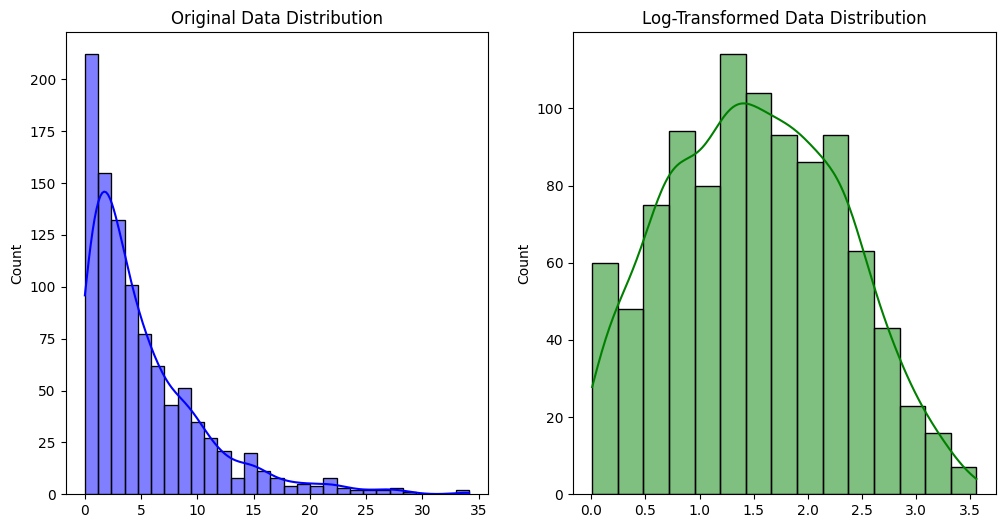

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generating a random dataset with a skewed distribution (using exponential distribution)
data = np.random.exponential(scale=5.0, size=999)

# Plotting the original data distribution
plt.figure(figsize=(12, 6))

# First subplot for the original data
plt.subplot(1, 2, 1)
sns.histplot(data, kde=True, color='blue')
plt.title("Original Data Distribution")

# Applying log transformation to the data
# np.log1p is used to handle the log transformation of data including zero values
log_transformed_data = np.log1p(data)

# Second subplot for the log-transformed data
plt.subplot(1, 2, 2)
sns.histplot(log_transformed_data, kde=True, color='green')
plt.title("Log-Transformed Data Distribution")

# Display the plots
plt.show()

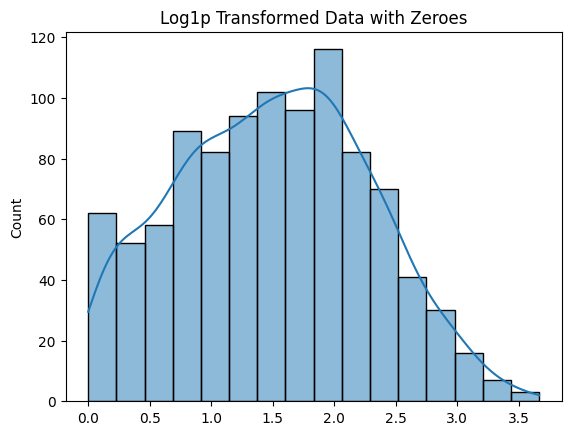

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generating a dataset with zeroes
data_with_zero = np.append(np.random.exponential(scale=5.0, size=999), 0)

# Applying log1p transformation
log1p_data = np.log1p(data_with_zero)

# Plotting
sns.histplot(log1p_data, kde=True)
plt.title('Log1p Transformed Data with Zeroes')
plt.show()
